# EE6310 - IMAGE PROCESSING - ASSIGNMENT 2

## ATHARV RAMESH NAIR - EE20BTECH11006

# 1 . GRAY SCALE POINT OPERATIONS

In [1]:
from matplotlib import pyplot as plt
import numpy as np

## LINKS FOR IMAGES USED FROM NASA WEBSITE
## Magellanic - https://apod.nasa.gov/apod/image/2302/magellanic.jpg
## mammatus_olson - https://apod.nasa.gov/apod/image/2302/mammatus_olson_1024.jpg
## CometZtfMars - https://apod.nasa.gov/apod/image/2302/CometZtfMars_Lioce_4229.jpg
## PearlCloudDennis7 - https://apod.nasa.gov/apod/image/2302/PearlCloudDennis7.jpg

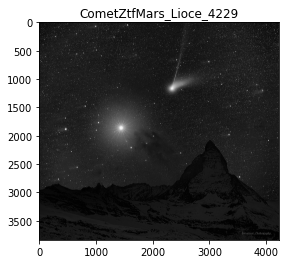

In [2]:
## OpenCV is used only for converting colour image to Gray Scale
import cv2
I = plt.imread('CometZtfMars_Lioce_4229.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
imgplot = plt.imshow(I,cmap = 'gray')
plt.title('CometZtfMars_Lioce_4229')
plt.show()

In [3]:
def transform(img,P,L):
    return np.clip(P*img+L,0,255)

In [4]:
P = 2
L = 10

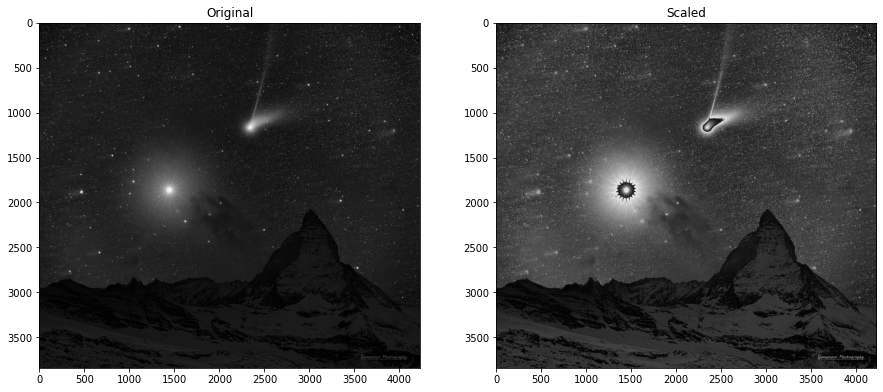

In [5]:
J1 = transform(I,P,0)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(I,cmap ='gray')
ax1.set_title("Original")
ax2.imshow(J1,cmap='gray')
ax2.set_title("Scaled")
plt.show()

In [6]:
J2 = transform(I,1,L)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(I,cmap ='gray')
ax1.set_title("Original")
ax2.imshow(J2,cmap='gray')
ax2.set_title("Offset")
plt.show()

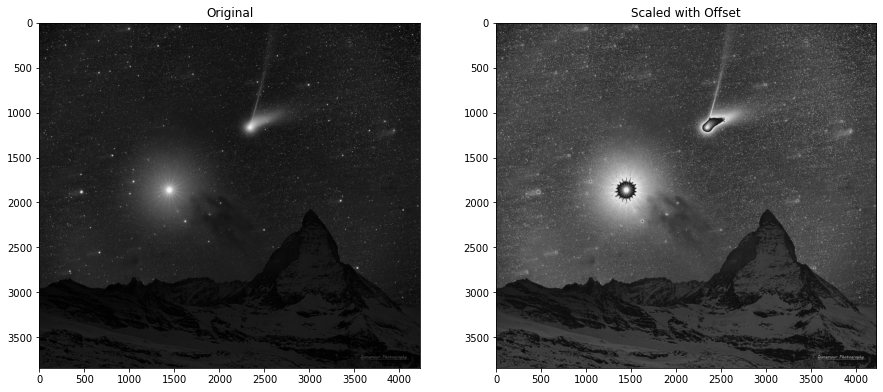

In [7]:
J3 = transform(I,P,L)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(I,cmap ='gray')
ax1.set_title("Original")
ax2.imshow(J3,cmap='gray')
ax2.set_title("Scaled with Offset")
plt.show()

In [8]:
def histogram(img,display = False):
    bins = np.linspace(0, 256, 257)
    histogram = np.histogram(img,bins=bins)
    
    if( display):
        plt.title("Histogram")
        plt.xlabel("Intensity")
        plt.ylabel("Frequency")
        plt.plot(histogram[0])
        plt.show()

    ## Returning only the histogram
    return histogram[0]

In [9]:
hist_I = histogram(I)
hist_J1 = histogram(J1)
hist_J2 = histogram(J2)
hist_J3 = histogram(J3)

In [10]:
plt.plot(hist_I,label ='I')
plt.plot(hist_J1,label ='2*I')
plt.plot(hist_J2,label ='I+10')
plt.plot(hist_J3,label ='2*I+10')
plt.title('Original Histograms')
plt.legend()
plt.show()


## The histograms are in accordance with what we discussed in class
## Important point to note is that the scaled images (2I and 2I + 10) only have even valued intensities. Hence the histogram drops to zeros at odd valued indices

## Below, I have interpolated the odd valued intensities which helps us obtain a smooth curve. This helps in visualisation

In [11]:
for i in range(127):
    hist_J1[2*i+1] = (hist_J1[2*i]+ hist_J1[2*i+2])/2
    hist_J3[2*i+1] = (hist_J3[2*i]+ hist_J3[2*i+2])/2
    
plt.plot(hist_I,label ='I')
plt.plot(hist_J1,label ='2*I')
plt.plot(hist_J2,label ='I+10')
plt.plot(hist_J3,label ='2*I+10')
plt.title('Smooth Histograms')
plt.legend()
plt.show()

## FSCS - FULL SCALE CONSTRAST STRETCH

Maximum Intensity in Image is  0
Minimum Intensity in Image is  210


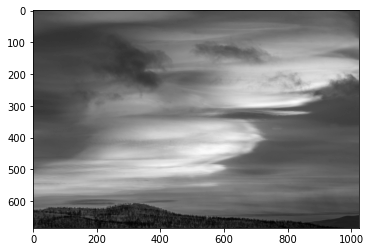

In [12]:
I = plt.imread('PearlCloudDennis7_1024.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
plt.imshow(I,cmap='gray')
min_val = np.min(I)
max_val = np.max(I)
print('Maximum Intensity in Image is ',min_val)
print('Minimum Intensity in Image is ',max_val)

In [13]:
def FSCS(img):
    K = 256
    min_val = np.min(I)
    max_val = np.max(I)
    P = (K-1)/(max_val-min_val)
    L = -min_val*(K-1)/(max_val-min_val)
    FSCS_ = transform(I,P,L)
    return FSCS_

In [14]:
fullScale = FSCS(I)
hist_I = histogram(I)
hist_FSCS = histogram(fullScale)

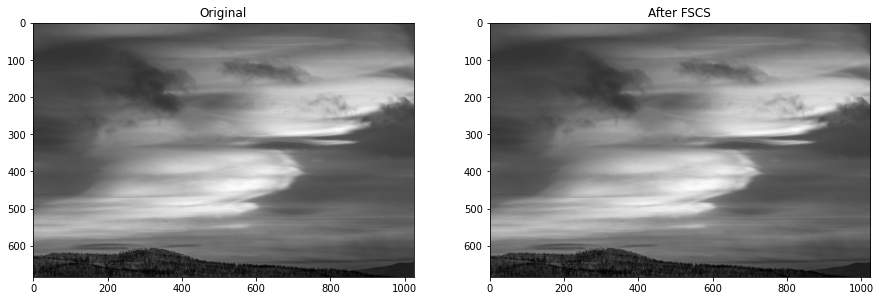

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.set_title("Original")
ax1.imshow(I,cmap ='gray')
ax2.set_title("After FSCS")
ax2.imshow(fullScale,cmap='gray')


In [16]:
min_val = round(np.min(fullScale))
max_val = round(np.max(fullScale))
print('Maximum Intensity in Image is ',min_val)
print('Minimum Intensity in Image is ',max_val)

Maximum Intensity in Image is  0
Minimum Intensity in Image is  255


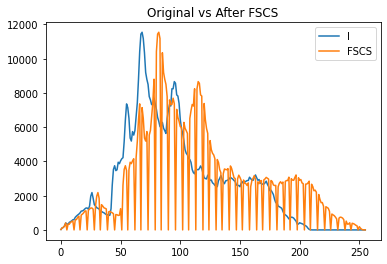

In [17]:
plt.plot(hist_I,label ='I')
plt.plot(hist_FSCS,label ='FSCS')
plt.legend()
plt.title('Original vs After FSCS')
plt.show()

### After performing FSCS , the number of pixels with certain intenisty values are zeros. That is the reason behind sudden drops to zero in the histogram. 

## LOG RANGE COMPRESSION

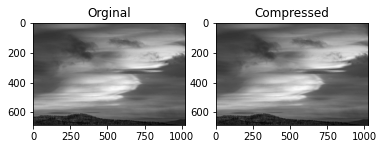

In [18]:
compressed = np.log(1+I)
compressed = FSCS(compressed)
plt.subplot(1,2,1)
plt.title('Orginal')
imgplot = plt.imshow(I,cmap = 'gray')
plt.subplot(1,2,2)
plt.title('Compressed')
imgplot = plt.imshow(compressed,cmap = 'gray')
plt.show()

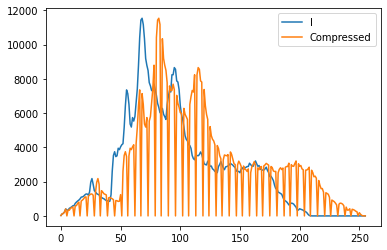

In [19]:
hist_I = histogram(I)
hist_compressed = histogram(compressed)
plt.plot(hist_I,label ='I')
plt.plot(hist_compressed,label ='Compressed')
plt.legend()
plt.show()

## GAMMA CORRECTION

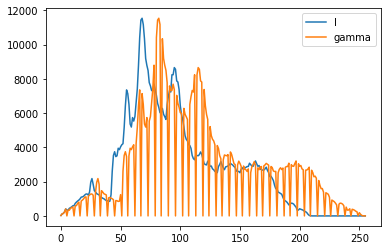

In [20]:
gamma = np.power(I,1.4)
gamma = np.clip(gamma,0,255)
gamma = FSCS(gamma)
hist_gamma = histogram(gamma)
plt.plot(hist_I,label ='I')
plt.plot(hist_gamma,label ='gamma')
plt.legend()
plt.show()

## HISTOGRAM FLATTENING

In [21]:
def PMF(img,display = False):
    bins = np.linspace(0, 256, 257)
    total_bits = img.shape[0]*img.shape[1]
    pmf = histogram(img,display = False)/total_bits
    if display:
        plt.title('Normalised Histogram - PDF')
        plt.xlabel('Intensity')
        plt.plot(pmf)
        plt.show()
    return pmf
def CDF(img,display = False):
    pmf = PMF(img)
    cdf = np.zeros(256)
    cdf[0] = pmf[0]
    for t in range(1,256):
        cdf[t] = cdf[t-1] + pmf[t]
    if display:
        plt.title('CDF')
        plt.xlabel('Intensity')
        plt.plot(cdf)
        plt.show()
    return cdf


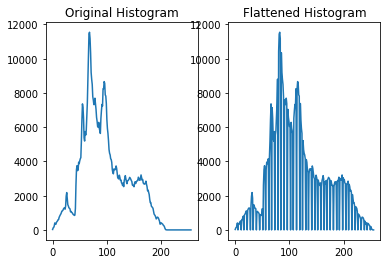

In [22]:
flat = np.round(CDF(I))
flat = FSCS(flat)
hist_flat = histogram(flat)
plt.subplot(1,2,1)
plt.title('Original Histogram')
plt.plot(hist_I)
plt.subplot(1,2,2)
plt.title('Flattened Histogram')
plt.plot(hist_flat)
plt.show()

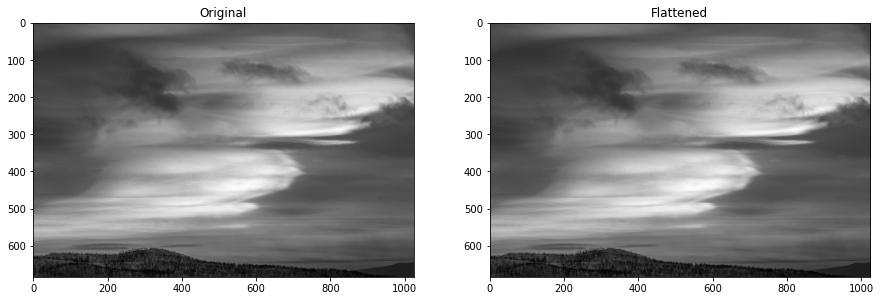

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))

ax1.set_title("Original")
ax1.imshow(I,cmap ='gray')
ax2.set_title("Flattened")
ax2.imshow(flat,cmap='gray')

# 2. IMAGE ZOOMING

In [49]:
## LOADING IMAGES
I1 = plt.imread('PearlCloudDennis7_1024.jpg')
I2 = plt.imread('mammatus_olson_960.jpg')
I3 = plt.imread('magellanic1200.jpg')
I1 = cv2.cvtColor(I1, cv2.COLOR_BGR2GRAY)[:512,:512]
I2 = cv2.cvtColor(I2, cv2.COLOR_BGR2GRAY)[:512,:512]
I3 = cv2.cvtColor(I3, cv2.COLOR_BGR2GRAY)[:512,:512]


## Working with 512X512 images since bilinear Intepolation takes time

In [25]:
## scale - Amount of times, the image is supposed to be scale
def nearestNeighbour(img,scale):
    m,n = img.shape
    zoomedImage = np.zeros((int(m*scale),int(n*scale)))
    
    for i in range(zoomedImage.shape[0]):
        for j in range(zoomedImage.shape[1]):
            
            zoomedImage[i][j] = img[int(i/scale)][int(j/scale)]
    return zoomedImage

In [26]:

def bilinear(img,scale):
    
    m,n = img.shape
    zoomedImage = np.zeros((int(m*scale),int(n*scale)))
    
    for i in range(zoomedImage.shape[0]):
        for j in range(zoomedImage.shape[1]):
           
            zoomedImage[i][j] = img[int(i/scale)][int(j/scale)]
  
    for i in range(zoomedImage.shape[0]-2):
        for j in range(zoomedImage.shape[1]-2): 
            
            mat1 = np.array([[zoomedImage[i][j]],[zoomedImage[i+2][j]],[zoomedImage[i][j+2]],[zoomedImage[i+2][j+2]]])
            mat2 = np.array([[1,i,j,i*j],[1,i+ 
                                          2,j,(i+2)*j],[1,i,j+2,i*(j+2)],[1,i+2,j+2,(i+2)*(j+2)]])
            
            coeffs = np.matmul(np.linalg.inv(mat2),mat1)

            for p in range(2):
                for q in range(2):
                    arr = np.array([[1],[i+p],[j+q],[(i+p)*(j+q)]])
                    zoomedImage[i+p, j+q] = np.dot(coeffs.T,arr)

    
    return zoomedImage
    

In [27]:
%%time
nn1 = nearestNeighbour(I1,1.5)
nn2 = nearestNeighbour(I2,1.5)
nn3 = nearestNeighbour(I3,1.5)

CPU times: user 1.17 s, sys: 631 µs, total: 1.17 s
Wall time: 1.17 s


In [28]:
%%time
bi1 = bilinear(I1,1.5)
bi2= bilinear(I2,1.5)
bi3 = bilinear(I3,1.5)

CPU times: user 1min 32s, sys: 1min 44s, total: 3min 17s
Wall time: 50.1 s


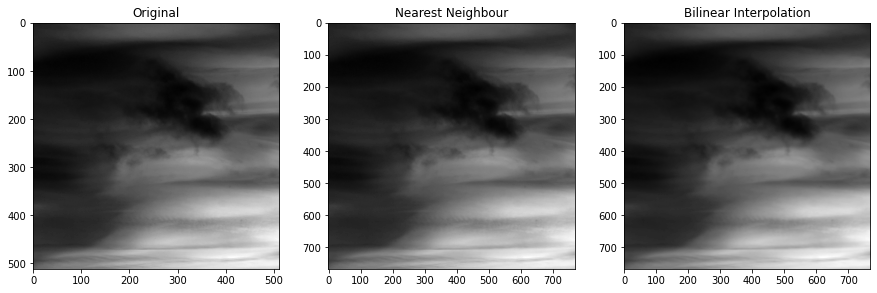

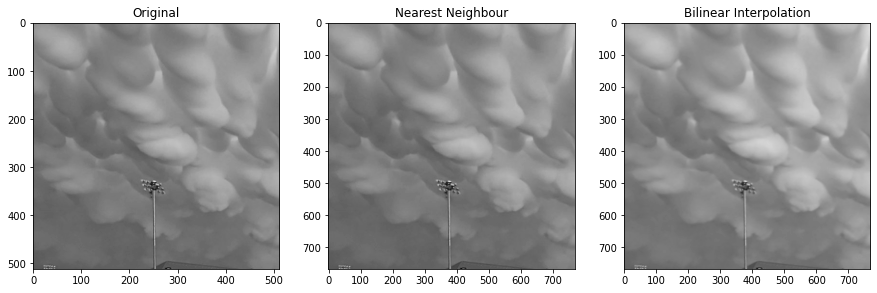

In [29]:

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize = (15,15))
ax1.imshow(I1,cmap ='gray')
ax1.set_title("Original")
ax2.imshow(nn1,cmap='gray')
ax2.set_title("Nearest Neighbour")
ax3.imshow(bi1,cmap='gray')
ax3.set_title("Bilinear Interpolation")
plt.show()

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize = (15,15))
ax1.imshow(I2,cmap ='gray')
ax1.set_title("Original")
ax2.imshow(nn2,cmap='gray')
ax2.set_title("Nearest Neighbour")
ax3.imshow(bi2,cmap='gray')
ax3.set_title("Bilinear Interpolation")
plt.show()

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize = (15,15))
ax1.imshow(I3,cmap ='gray')
ax1.set_title("Original")
ax2.imshow(nn3,cmap='gray')
ax2.set_title("Nearest Neighbour")
ax3.imshow(bi3,cmap='gray')
ax3.set_title("Bilinear Interpolation")
plt.show()

### Bilinear Interpolation seems to be more smoother but it comes at the cost of a higher Computational cost
### Even though both of them are of $O(n^2)$ but the later has multiple for loops and matrix inversions . Hence the higher computation time. At really large values of n (> 10,000) , the difference may be minimal, but since we are dealing with 512 x 512 images, the time difference for computation is high
### Nearest Neighbour Method took around 1.2s for three images
###  Bilinear Interpolation Method took around 50s for three images


# 3. 2D - DISCRETE FOURIER TRANSFORM

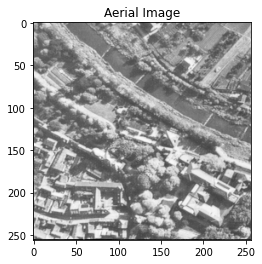

In [30]:
I = plt.imread('5.1.10.tiff')
plt.imshow(I,cmap='gray')
plt.title("Aerial Image")
plt.show()

## Iterative Implementation of DFT and IDFT

In [31]:
PI  = np.pi

def DFT_iterative(img):
    M,N = img.shape
    #print(img.shape)
    DFT = np.zeros((M,N),dtype =complex)
    for u in range(M):
        for v in range(N):
            #print(v,u)
            real = 0
            imag = 0
            for r in range(M):
                for c in range(N):
                    #DFT[u][v] += I[r, c]*np.cos(2*np.pi*((u*r)/M + (v*c)/N)) - 1j*I[r, c]*np.sin(2*np.pi*((u*r)/M + (v*c)/N))
                    
                    DFT[u][v] += img[r][c] *np.exp(-(1j)*(2*PI)*(u*c/N + v*r/M))
    return DFT

def IDFT_iterative(I):
    M,N = I.shape
    IDFT = np.zeros((M,N),dtype =complex)
    for u in range(M):
        for v in range(N):
            for r in range(M):
                for c in range(N):
                    #IDFT[u][v] += I[r, c]*np.cos(2*np.pi*((u*r)/M + (v*c)/N)) + 1j*I[r, c]*np.sin(2*np.pi*((u*r)/M + (v*c)/N))

                    IDFT[u][v] += (1/M*N)*I[r][c] *np.exp((1j)*(2*PI)*(u*c/N + v*r/M))
#                     if IDFT[u][v] > 255:
#                         IDFT[u][v] = 255
    return (np.real(IDFT/(M*N)))
    
   

### Iterative Implementation on a 32X32 Image

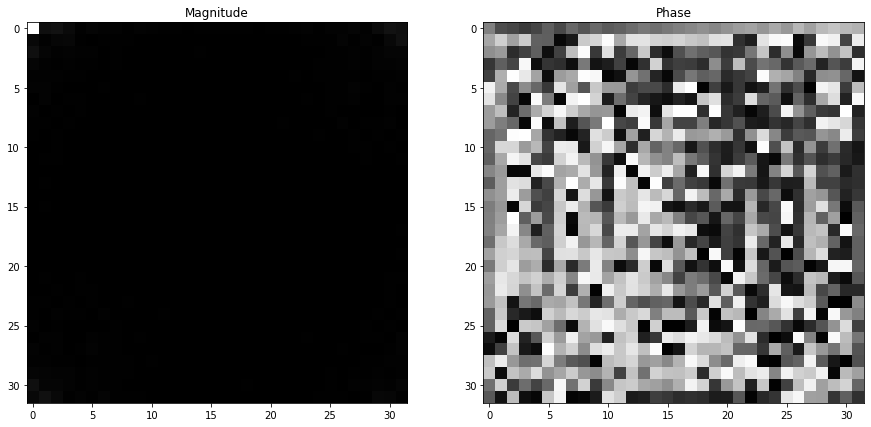

CPU times: user 2.03 s, sys: 143 ms, total: 2.17 s
Wall time: 2 s


In [32]:
%%time
DFT = DFT_iterative(I[:32 ,:32])
# DFT = DFT_iterative(I)
mag = np.absolute(DFT)
phase = np.angle(DFT)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(mag,cmap ='gray')
ax1.set_title("Magnitude")
ax2.imshow(phase,cmap='gray')
ax2.set_title("Phase")
plt.show()


# IDFT vs Original Image

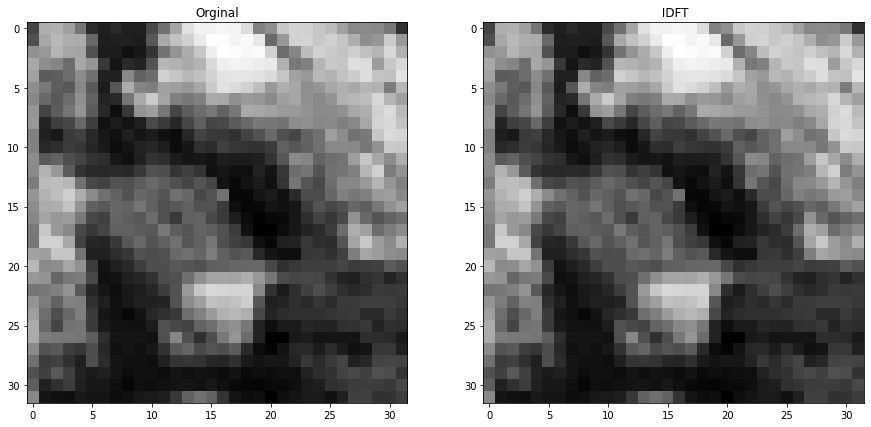

CPU times: user 2.02 s, sys: 150 ms, total: 2.17 s
Wall time: 1.99 s


In [33]:
%%time
IDFT = IDFT_iterative(DFT)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(I[:32,:32],cmap ='gray')
ax1.set_title("Orginal")
ax2.imshow(IDFT,cmap='gray')
ax2.set_title(" IDFT")
plt.show()

## MATRIX IMPLEMENTATION OF DFT

In [34]:
def DFT_Matrix(N):
    i, j = np.meshgrid(np.arange(N), np.arange(N))
    omega = np.exp( - 2 * np.pi * 1j / N )
    W = np.power( omega, i * j )
    return W

def IDFT_Matrix(N):
    i, j = np.meshgrid(np.arange(N), np.arange(N))
    omega = np.exp(2 * np.pi * 1j / N )
    W = np.power( omega, i * j )/N
    return W

In [35]:
def DFT_2(img):
    M,N = img.shape
    WN = DFT_Matrix(N)
    WM = DFT_Matrix(M)
    return np.matmul(np.matmul(WN,img),WM)
def IDFT_2(I):
    M,N = I.shape
    WN = DFT_Matrix(N)
    WM = DFT_Matrix(M)
    img  = np.dot(np.matmul(WM,I),WN)
    img = (np.real(img))
    img = np.flip(img)

    #img = np.clip(np.real(img), 0, 255)
    return img

### Verification of Matrix Implementation

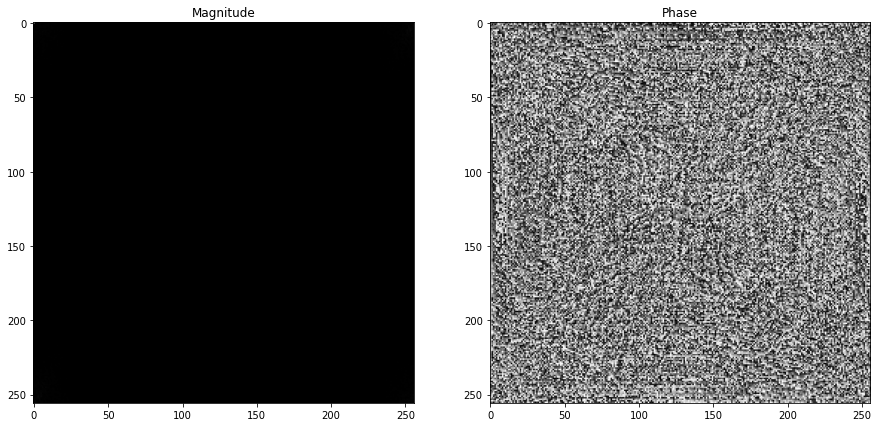

CPU times: user 813 ms, sys: 894 ms, total: 1.71 s
Wall time: 379 ms


In [36]:
%%time
DFT = DFT_2(I)
mag = np.absolute(DFT)
phase = np.angle(DFT)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(mag,cmap ='gray')
ax1.set_title("Magnitude")
ax2.imshow(phase,cmap='gray')
ax2.set_title("Phase")
plt.show()


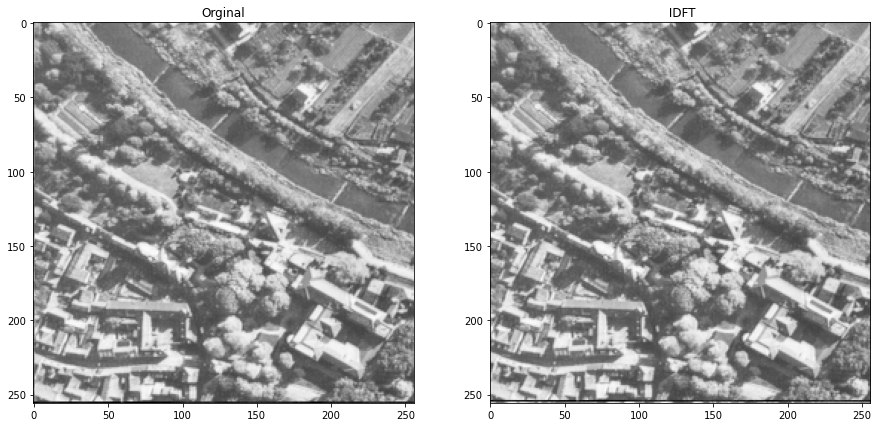

CPU times: user 686 ms, sys: 855 ms, total: 1.54 s
Wall time: 391 ms


In [37]:
%%time
IDFT = IDFT_2(DFT)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(I,cmap ='gray')
ax1.set_title("Orginal")
ax2.imshow(IDFT,cmap='gray')
ax2.set_title(" IDFT")
plt.show()

Image 1


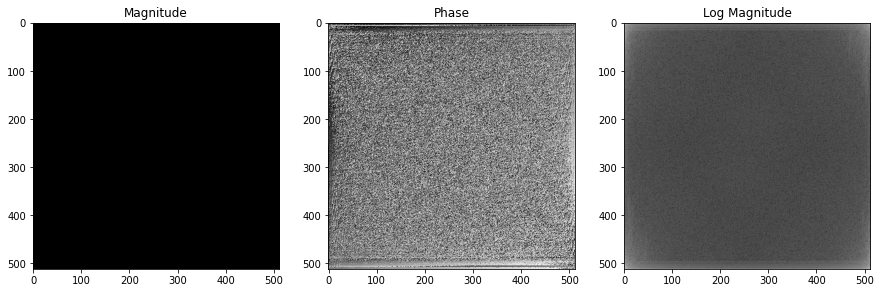

Image 2


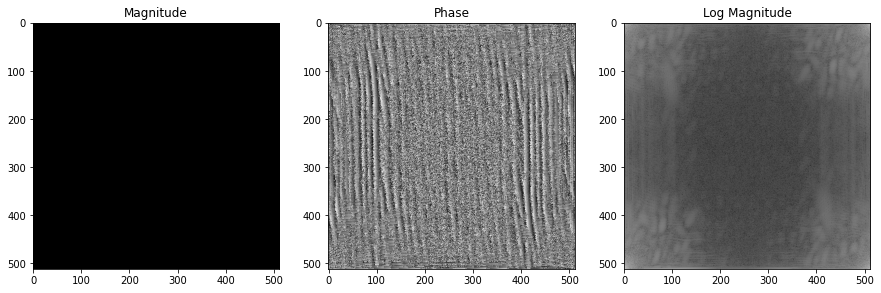

Image 3


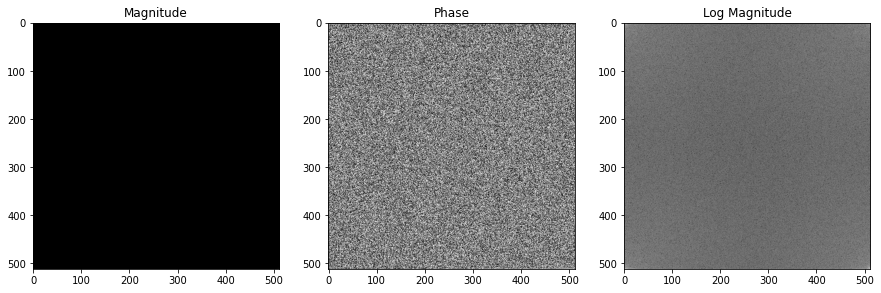

In [38]:
DFT = DFT_2(I1)
mag = np.absolute(DFT)
phase = np.angle(DFT)
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize = (15,15))
ax1.imshow(mag,cmap ='gray')
ax1.set_title("Magnitude")
ax2.imshow(phase,cmap='gray')
ax2.set_title("Phase")
ax3.imshow(np.log(1+mag),cmap='gray')
ax3.set_title("Log Magnitude")
print('Image 1')
plt.show()

DFT = DFT_2(I2)
mag = np.absolute(DFT)
phase = np.angle(DFT)
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize = (15,15))
ax1.imshow(mag,cmap ='gray')
ax1.set_title("Magnitude")
ax2.imshow(phase,cmap='gray')
ax2.set_title("Phase")
ax3.imshow(np.log(1+mag),cmap='gray')
ax3.set_title("Log Magnitude")
print('Image 2')

plt.show()

DFT = DFT_2(I3)
mag = np.absolute(DFT)
phase = np.angle(DFT)
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize = (15,15))
ax1.imshow(mag,cmap ='gray')
ax1.set_title("Magnitude")
ax2.imshow(phase,cmap='gray')
ax2.set_title("Phase")
ax3.imshow(np.log(1+mag),cmap='gray')
ax3.set_title("Log Magnitude")
print('Image 3')
plt.show()

### Centred DFT

In [39]:
def centredDFT(img):
    M,N = img.shape
    
    i,j = np.meshgrid(np.arange(M),np.arange(N))
    
    return DFT_2(np.matmul(np.power(-1,i+j),img))
    

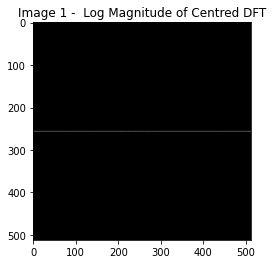

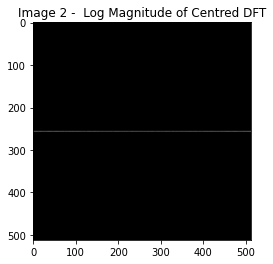

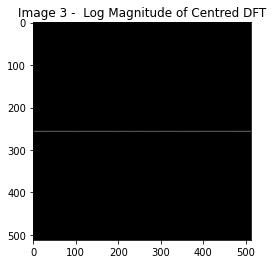

In [40]:
DFT = centredDFT(I1)
mag = np.absolute(DFT)
phase = np.angle(DFT)
plt.imshow(np.log(1+mag),cmap = 'gray')
plt.title('Image 1 -  Log Magnitude of Centred DFT')
plt.show()


DFT = centredDFT(I2)
mag = np.absolute(DFT)
phase = np.angle(DFT)
plt.imshow(np.log(1+mag),cmap = 'gray')
plt.title('Image 2 -  Log Magnitude of Centred DFT')
plt.show()

DFT = centredDFT(I3)
mag = np.absolute(DFT)
phase = np.angle(DFT)
plt.imshow(np.log(1+mag),cmap = 'gray')
plt.title('Image 3 -  Log Magnitude of Centred DFT')
plt.show()

## IDFT[DFT] = I

Image 1


Image 2


Image 3


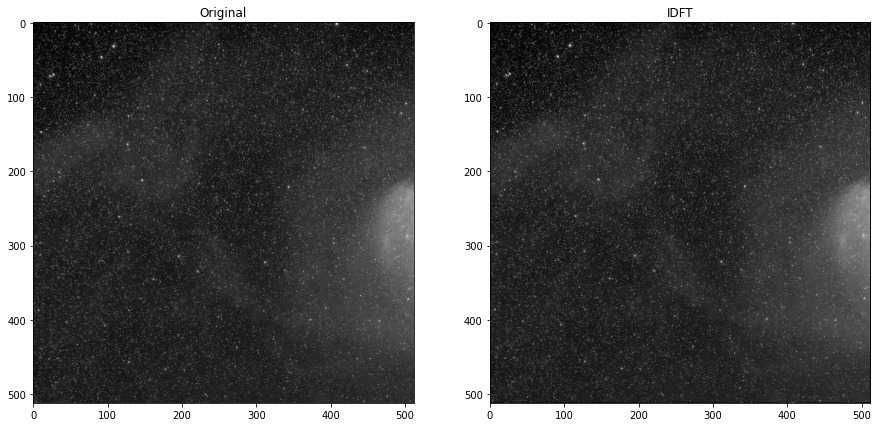

In [41]:
DFT = DFT_2(I1)
IDFT1 = IDFT_2(DFT)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(I1,cmap ='gray')
ax1.set_title("Original")
ax2.imshow(IDFT1,cmap='gray')
ax2.set_title("IDFT")
print('Image 1')
plt.show()

DFT = DFT_2(I2)
IDFT2 = IDFT_2(DFT)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(I2,cmap ='gray')
ax1.set_title("Original")
ax2.imshow(IDFT2,cmap='gray')
ax2.set_title("IDFT")
print('Image 2')
plt.show()

DFT = DFT_2(I3)
IDFT3 = IDFT_2(DFT)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(I3,cmap ='gray')
ax1.set_title("Original")
ax2.imshow(IDFT3,cmap='gray')
ax2.set_title("IDFT")
print('Image 3')
plt.show()

In [42]:
if np.allclose(I1, IDFT1):
    print("IDFT[DFT[I]] == I for Image 1")
else:
    print("IDFT[DFT[I]] != I for Image 1")
    
if np.allclose(I2, IDFT2):
    print("IDFT[DFT[I]] == I for Image 2")
else:
    print("IDFT[DFT[I]] != I for Image 2")
    
if np.allclose(I3, IDFT3):
    print("IDFT[DFT[I]] == I for Image 3")
else:
    print("IDFT[DFT[I]] != I for Image 3")

IDFT[DFT[I]] != I for Image 1
IDFT[DFT[I]] != I for Image 2
IDFT[DFT[I]] != I for Image 3


## Phase Distortion

### TRANSPOSING PHASE

In [43]:
DFT1 = DFT_2(I1)
mag1 = np.absolute(DFT1)
phase1 = np.angle(DFT1)
phase_modified = phase1.T
DFT_modified = mag1*np.exp(1j*phase_modified)
IDFT1 = IDFT_2(DFT_modified)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(I1,cmap ='gray')
ax1.set_title("Orginal")
ax2.imshow(IDFT1,cmap='gray')
ax2.set_title(" IDFT")
plt.show()

DFT2 = DFT_2(I2)
mag2 = np.absolute(DFT2)
phase2 = np.angle(DFT2)
phase_modified = phase2.T
DFT_modified = mag2*np.exp(1j*phase_modified)
IDFT2 = IDFT_2(DFT_modified)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(I2,cmap ='gray')
ax1.set_title("Orginal")
ax2.imshow(IDFT2,cmap='gray')
ax2.set_title(" IDFT")
plt.show()


DFT3 = DFT_2(I3)
mag3 = np.absolute(DFT3)
phase3 = np.angle(DFT3)
phase_modified = phase3.T
DFT_modified = mag3*np.exp(1j*phase_modified)
IDFT3 = IDFT_2(DFT_modified)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(I3,cmap ='gray')
ax1.set_title("Orginal")
ax2.imshow(IDFT3,cmap='gray')
ax2.set_title(" IDFT")
plt.show()



### Transposing the phase results in the image being rotated. There seems to some amount of distortion

### Phase = 0

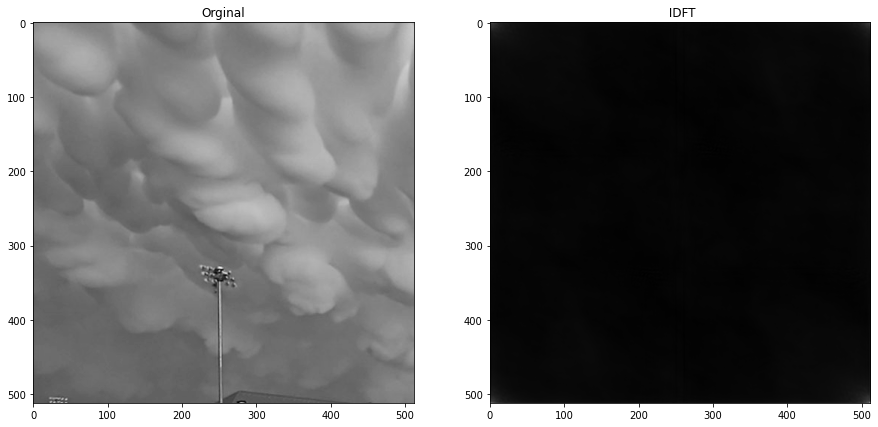

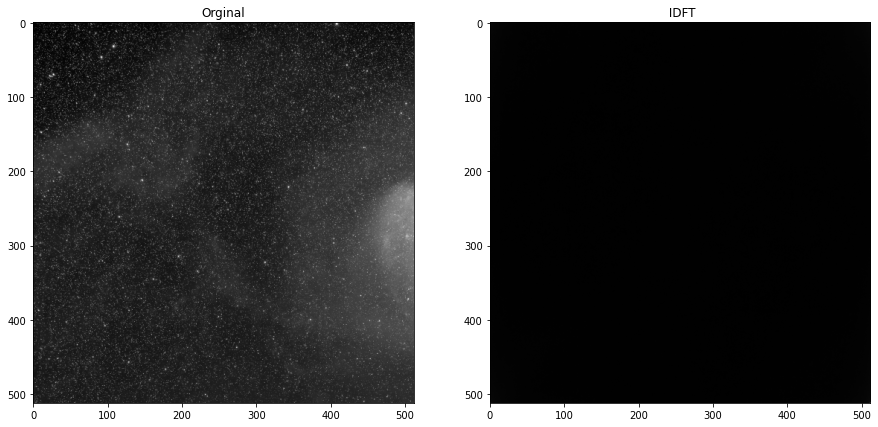

In [44]:

phase_modified = 0
DFT = mag1*np.exp(1j*phase_modified)
IDFT = IDFT_2(DFT)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(I1,cmap ='gray')
ax1.set_title("Orginal")
ax2.imshow(IDFT,cmap='gray')
ax2.set_title(" IDFT")
plt.show()

phase_modified = 0
DFT = mag2*np.exp(1j*phase_modified)
IDFT = IDFT_2(DFT)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(I2,cmap ='gray')
ax1.set_title("Orginal")
ax2.imshow(IDFT,cmap='gray')
ax2.set_title(" IDFT")
plt.show()

phase_modified = 0
DFT = mag3*np.exp(1j*phase_modified)
IDFT = IDFT_2(DFT)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(I3,cmap ='gray')
ax1.set_title("Orginal")
ax2.imshow(IDFT,cmap='gray')
ax2.set_title(" IDFT")
plt.show()

### Making the phase = 0 leads to loss of information. The IDFT is not able to regenerate any aspect of the original image

### Adding Noise to Phase

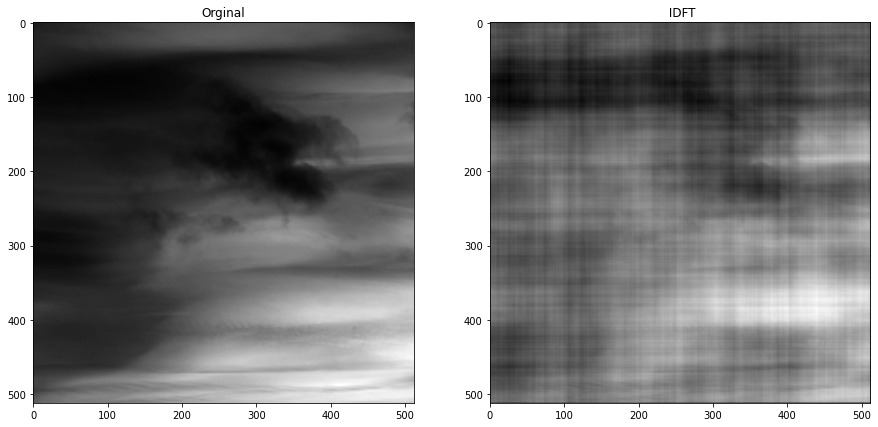

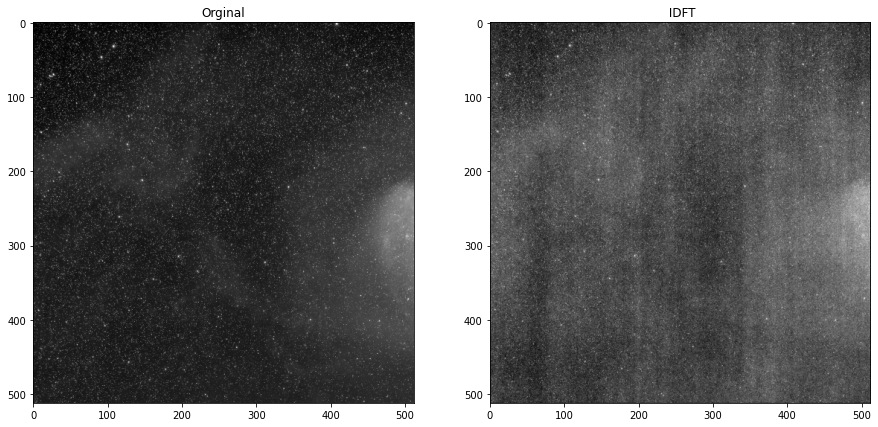

In [45]:
phase_modified = phase1 +  np.random.normal(size = phase1.shape)
DFT = mag1*np.exp(1j*phase_modified)
IDFT = IDFT_2(DFT)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(I1,cmap ='gray')
ax1.set_title("Orginal")
ax2.imshow(IDFT,cmap='gray')
ax2.set_title(" IDFT")
plt.show()


phase_modified = phase2 +  np.random.normal(size = phase2.shape)
DFT = mag2*np.exp(1j*phase_modified)
IDFT = IDFT_2(DFT)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(I2,cmap ='gray')
ax1.set_title("Orginal")
ax2.imshow(IDFT,cmap='gray')
ax2.set_title(" IDFT")
plt.show()


phase_modified = phase3 +  np.random.normal(size = phase3.shape)
DFT = mag3*np.exp(1j*phase_modified)
IDFT = IDFT_2(DFT)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,15))
ax1.imshow(I3,cmap ='gray')
ax1.set_title("Orginal")
ax2.imshow(IDFT,cmap='gray')
ax2.set_title(" IDFT")
plt.show()

### Adding Noise to phase leads to some distortion in the IDFT also

### Distorting Phase has a significant effect on the Final Synthesised Image using IDFT